# Visualization with Seaborn

__Import libraries__

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

## Seaborn Versus Matplotlib

In [6]:
rng = np.random.RandomState(21)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

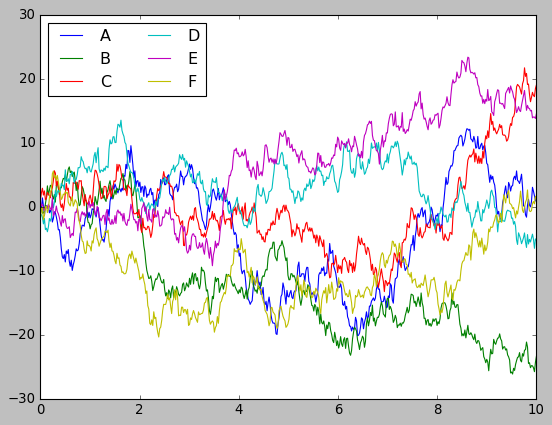

In [11]:
# plot the daa with matplotlib defaults
plt.plot(x, y)
plt.legend(list('ABCDEF'), ncol=2, loc='upper left');

Now, for seaborn:

In [12]:
import seaborn as sns
sns.set()

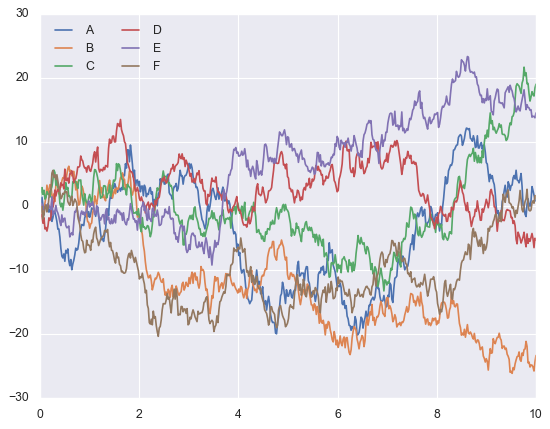

In [15]:
# same plotting code as above
plt.plot(x, y)
plt.legend(list('ABCDEF'), ncol=2, frameon=False, loc='upper left');

---

## Exploring Seaborn Plots

### Histograms, KDE, and densities

In [17]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

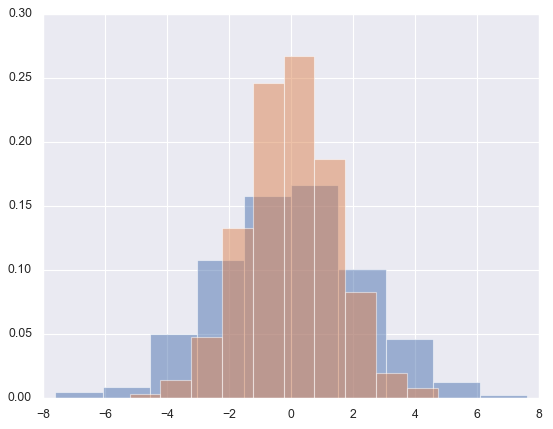

In [18]:
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

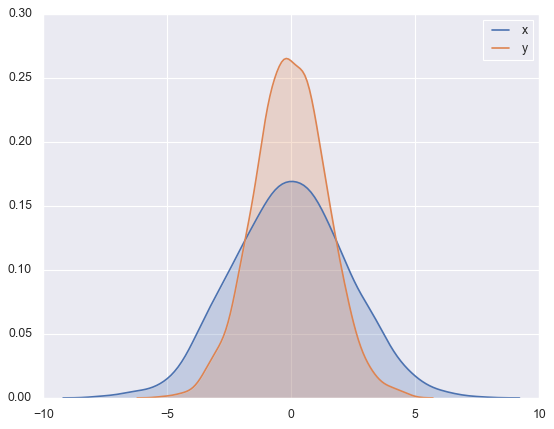

In [19]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

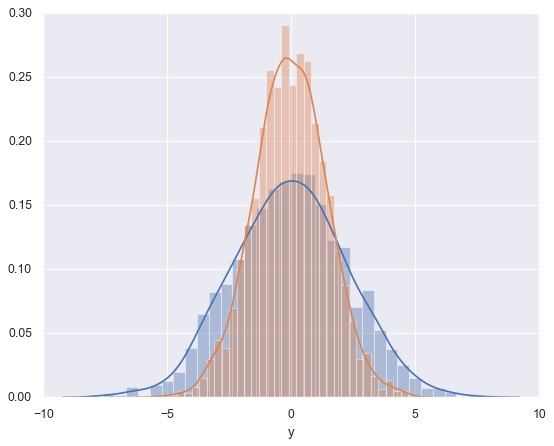

In [23]:
# combined histogram and kde
for col in 'xy':
    sns.distplot(data[col])

C:\Users\Agus Richard Lubis\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


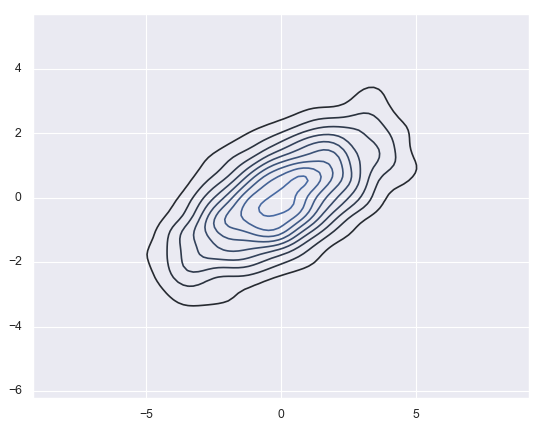

In [25]:
sns.kdeplot(data); # pass two-column data

The joint distribution and the marginal distributions together using
sns.jointplot.

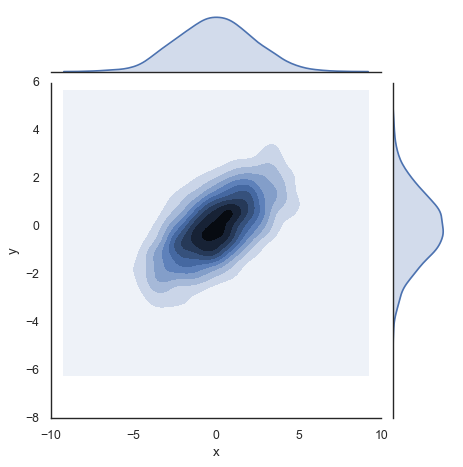

In [27]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde');

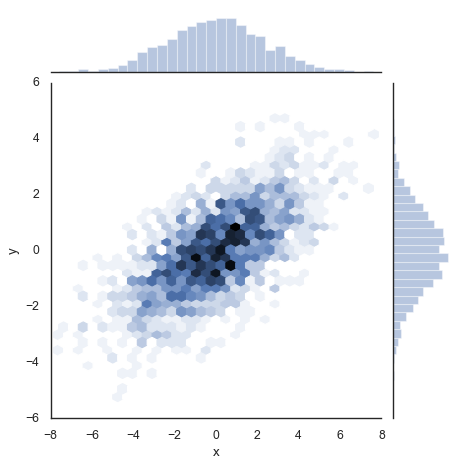

In [29]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex');

### Pair plots

In [30]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


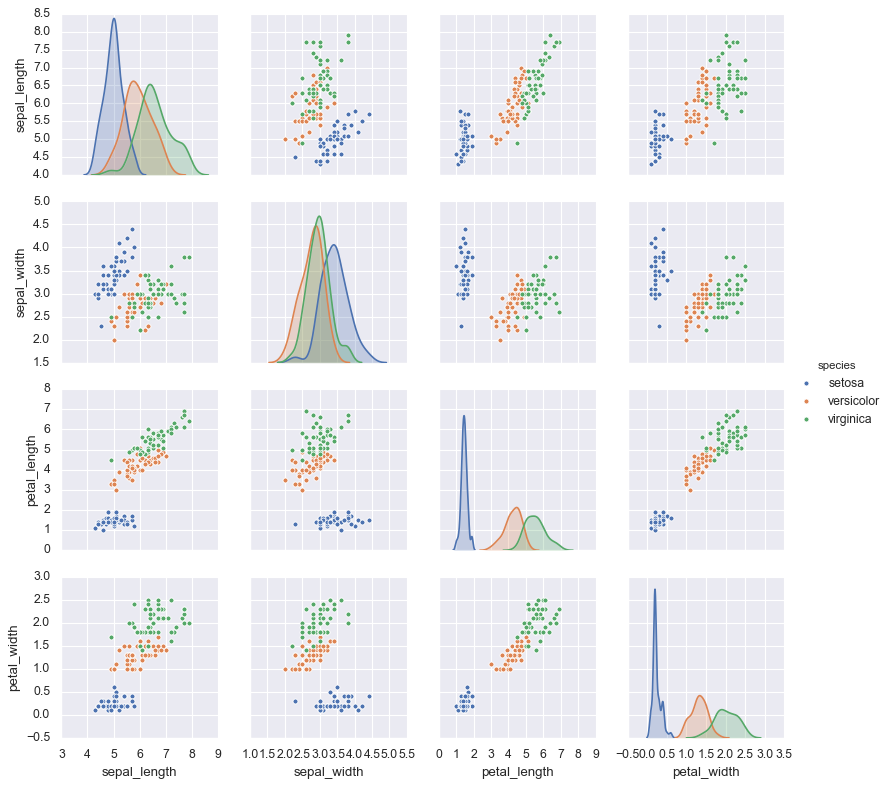

In [35]:
sns.pairplot(iris, hue='species', height=2.5, diag_kind='auto');

### Faceted histograms

In [36]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


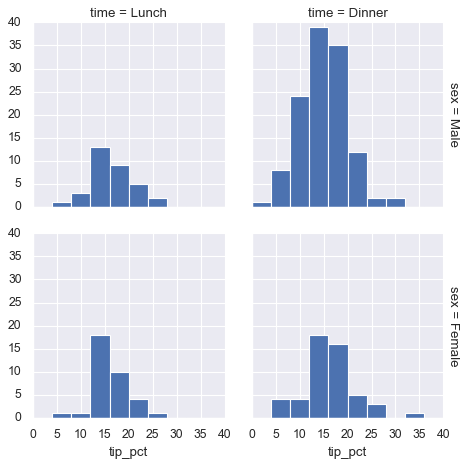

In [38]:
tips['tip_pct'] = 100*tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 11));

### Factor plots

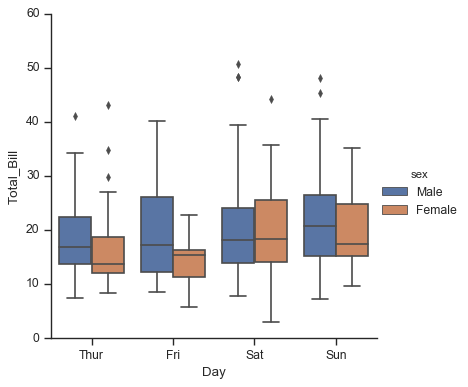

In [44]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind='box')
    g.set_axis_labels('Day', 'Total_Bill');